In [1]:
%matplotlib inline


784
The total number of pixels is 3145728
The maximum ell of the power spectrum C_l set to lmax = 2*nside 1024
Healpix tells me total number of pixels npix is equal to 3145728
NSIDE = 512
ORDERING = RING in fits file
CMB map, Noise map
NSIDE = 512
ORDERING = RING in fits file
[ -4.64036384e-05  -5.68271571e-05  -6.57469354e-05  -5.14407293e-05
  -4.42267192e-05  -4.06553991e-05  -4.96805151e-05  -6.85959385e-05
  -7.99925620e-05  -7.44794525e-05  -5.49133438e-05  -4.50685984e-05
  -4.87731159e-05  -4.11291621e-05  -3.33236421e-05  -4.14953538e-05
  -6.18486956e-05  -8.04939336e-05  -9.21475657e-05  -9.52325790e-05]
[  1.14222580e-07  -2.31099847e-07   2.87925303e-07  -1.75373643e-07
  -9.55032675e-08   1.59721907e-07   2.78377286e-08  -4.68062865e-07
  -7.01238889e-08   5.53504663e-07   5.31789262e-08  -1.96629713e-07
  -4.12903276e-08  -6.54400978e-08   4.59836755e-08   1.09771685e-08
  -2.79734337e-07  -4.59604394e-07  -1.82999187e-07   3.79771592e-07]
[ -4.64036384e-05  -5.68271571e

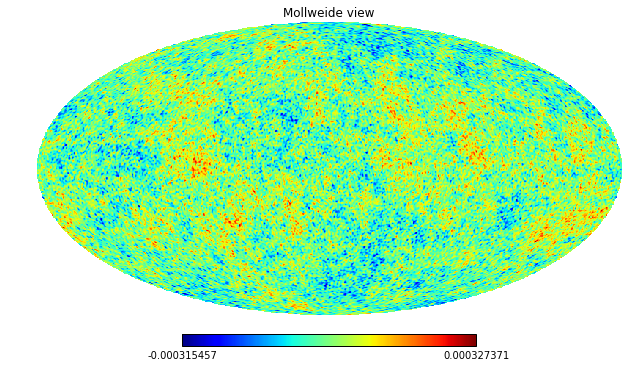

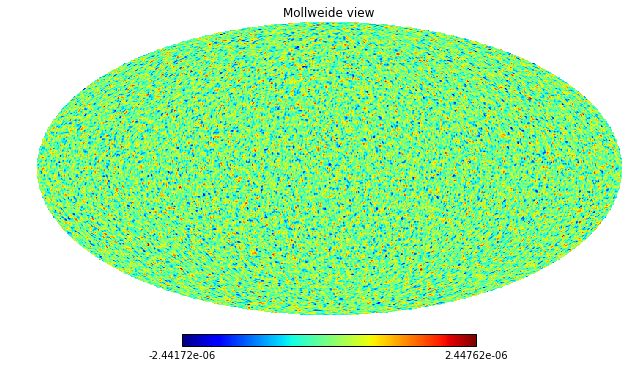

In [2]:
# In[1]:

from __future__ import (division, print_function, absolute_import)


# In[2]:

import math
import matplotlib.pyplot as plt 
import numpy as np
import healpy as hp
import pyfits as pf
import astropy as ap
import os
from scipy.special import eval_legendre  ##special scipy function


# In[3]:

# http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.io.readsav.html
# http://www.astrobetter.com/blog/2009/11/24/read-idl-save-files-into-python/


# In[4]:

import scipy


# In[5]:

#
# scipy.io.readsav
#
# scipy.io.readsav(file_name, idict=None, python_dict=False, uncompressed_file_name=None, verbose=False)[source]
#
# Read an IDL .sav file
#
#


# In[6]:

import os
os.getcwd()
os.chdir("/Users/evanbiederstedt/downloads")


import scipy.io


# In[8]:

patch_file = scipy.io.readsav('listpix_patch4.sav')


# In[ ]:




# In[9]:

type(patch_file)


# In[10]:

arr3 = patch_file['listpix_patch4']
#print(arr3)


# In[11]:

type(arr3)


# In[12]:

print(len(arr3)) # pixels total 768


# In[13]:

smica_map = "GAVO_nside512_omegab_004.fits"


# In[ ]:




# In[14]:

nside=512
npix = 12*(nside**2) #total number of pixels, npix
LMAX = ((2*nside)) #maximum l of the power spectrum C_l
heal_npix = hp.nside2npix(nside) # Healpix calculated npix

print("The total number of pixels is " + str(npix))
print("The maximum ell of the power spectrum C_l set to lmax = 2*nside " +str(LMAX))
print("Healpix tells me total number of pixels npix is equal to " + str(heal_npix))


# In[15]:

mapread_smica = hp.read_map(smica_map, field=0)
#hp.mollview(mapread_camb512)
#hp.mollview(mapread_smica)
print("CMB map, Noise map")
smica_noise = hp.read_map(smica_map, field=1)
#hp.mollview(smica_noise)




hp.mollview(mapread_smica)


hp.mollview(smica_noise)

# In[16]:

print(mapread_smica[:20])
print(smica_noise[:20])


# In[17]:

smica512 = mapread_smica
noise512 = smica_noise
print(smica512[:20])
print(noise512[:20])


# In[18]:

print(len(smica512))
print(len(noise512))


# In[ ]:




# In[19]:

# rename array for convenience
tempval = smica512

# Data:
#     tempval      # the array of pixel values, (3145728,)


# In[20]:

print(len(tempval))
print(tempval.shape)
tempval[:10]


# In[21]:

#
# We only wish to use the pixels defined in our patch
# These pixel indices are listed in arr3 such that total number pixels total 12476
#
# arr3: this defines pixel indices within patch
# 
# To access pixel indices within array of CMB pixels, just use tempval[arr3]
#


patch =  tempval[arr3]
noisepatch = noise512[arr3]


# In[22]:

print(len(patch))
print(len(noisepatch))


# In[23]:

print(patch[:30])
print(noisepatch[:30])


# In[24]:

# The log-likelihood
#
# -2lnL \propto m^T C^-1 m + ln det C + N ln (2pi)
#
# First term, m^T C^-1 m is the "model fit term"
# Second term, lndetC is the "complexity penalty"
# Third term, N ln 2pi, a constant
#
# m = tempval
# C = Sij


# In[25]:

m = patch


# In[26]:

# Next, create the matrix, n_i /cdot n_j
# solely using Healpy routines, i.e. taking the dot product of the vectors
# The result is "dotproductmatrix"


# In[27]:

npix


# In[28]:

nside


# In[29]:

## healpy.pixelfunc.pix2vec(nside, ipix, nest=False)
## 
## will give three arrays
## arrays of all x values, all y values, all z values
## RING scheme default
# len()=3
# type()=tuple


# In[30]:

vecval = hp.pix2vec(nside, arr3) #Nside = 512, type()=tuple


# In[31]:

len(vecval)


# In[32]:

vecvalx = vecval[0] #len() = 12476
vecvaly = vecval[1]
vecvalz = vecval[2]


# In[33]:

# First arrange arrays vertically
# numpy.vstack = Stack arrays in sequence vertically (row wise), input sequence of arrays
totalvecval = np.vstack((vecvalx, vecvaly, vecvalz)) #type()=numpy.ndarray


# In[34]:

trans = totalvecval.T #transpose


# In[35]:

dotproductmatrix = trans.dot(totalvecval) #take the dot product
print(dotproductmatrix.shape) # = (npix, npix) = (12476, 12476)
# type(dotproductmatrix) = np.ndarray


# In[36]:

#
# The following procedure is for the angular power spectrum, C^th_ell
# However, we are using some cosmological parameter, /alpha
#
#
# =========================================================
# =========================================================
#
# \Sum_l (2*l + 1)/4pi C^th_l P_l (dotproductmatrix)
# sum from l=2 to l=lmax
#
# arrays l = [2 3 4 .... lmax]
#        C_l = [C_2 C_3 .... C_lmax]
#
# The correct way to do the summation:
# 
# Step 1: calculate the matrix
#            M = dotproductmatrix
#
# Step 2: evaluate the function P_l(x) for each entry of the matrix
#         OUTPUT: [P_2(M) P_3(M) P_4(M) .... P_lmax(M) ]
#
# Step 3: (2*l +1)/4pi from l=2 to l=lmax
#          [5/4pi 7/4pi 9/4pi 11/4pi .... 65/4pi ]
#
# Step 4: multiply 
#         [5/4pi*P_2(M) + 7/4pi*P_3(M) +...... + 65/4pi*P_32(M)]
#
#
# Step 5: multiply by theoretical CAMB values, [C_2 C_3    C_31 C_32]
#         [5/4pi**C_2* P_2(M) + 7/4pi*C_3* P_3(M) +...... + 65/4pi*C_32* P_32(M)]
#
# Step 6: This is an array of S_ij for each theory C_l, l=2 to l=32
#         
#
#
# =========================================================
# =========================================================


# In[37]:

#print(dotproductmatrix)


# In[ ]:




# In[38]:

# For lmax = 1100, we must create an array of ell values, i.e. [0 1 2 3....1599 1600]
ell = np.arange(1101)
#print(ell)
# 
# Subtract the monopole and dipole, l=0, l=1
ellval = ell[2:]
#print(ellval)

In [3]:

# In[13]:

PlM_50 = "cl_varyBaryonlmax1100patch4PlMat50.npy"
PlM_100 = "cl_varyBaryonlmax1100patch4PlMat100.npy"
PlM_150 = "cl_varyBaryonlmax1100patch4PlMat150.npy"

# In[14]:

data1 = np.load(PlM_50)
data2 = np.load(PlM_100)
data3 = np.load(PlM_150)


# In[15]:

print(data1.shape)
print(data2.shape)
print(data3.shape)


# In[16]:

type(data1)


# In[ ]:

ff = "CAMB_cl_varyBaryonlmax1100.npy"

cell_array = np.load(ff)

print(cell_array.shape)


(399, 784, 784)
(350, 784, 784)
(350, 784, 784)
(40, 1099)


In [4]:

PlMat_total = np.concatenate((data1, data2, data3))


# In[18]:

PlMat_total.shape


# In[ ]:




# In[19]:

PlMat = PlMat_total


# In[20]:

PlMat[2]


# In[ ]:

# Step 3: (2*l +1)/4pi from l=2 to l=lmax
#          [5/4pi 7/4pi 9/4pi 11/4pi .... 65/4pi ]
norm = ((2*ellval + 1))/(4*math.pi)
print(len(ellval))
print(norm.shape)
print(norm[2])



1099
(1099,)
0.716197243914


In [5]:

# Step 4: multiply 
#         [5/4pi*P_2(M) + 7/4pi*P_3(M) +...... + 65/4pi*P_32(M)]
#
# multiply PlMat by (2*l+1)/4pi, i.e. norm
norm_matrix = norm[:, None, None] * PlMat
# [5/4pi * P_2(M)  7/4pi * P_3(M) ....   65/4pi * P_32(M)]


# In[ ]:

print(norm_matrix.shape)


# In[ ]:

print(PlMat.shape)


# In[ ]:

# Step 5: multiply by theoretical CAMB values, [C_2 C_3    C_31 C_32]
#         [5/4pi**C_2* P_2(M) + 7/4pi*C_3* P_3(M) +...... + 65/4pi*C_32* P_32(M)]



(1099, 784, 784)
(1099, 784, 784)


In [6]:

# define pixel-value arrays
mT = np.matrix(patch)     # mT.shape = (1, 3072)
m = np.matrix(patch).T    # m.shape = (3072, 1)
Npix2pi = (len(patch))*2*math.pi  # LF constant
print(mT.shape)
print(m.shape)
print(Npix2pi)



(1, 784)
(784, 1)
4926.017280828795


In [7]:
tempp = patch
noise = noisepatch

In [29]:
forty_samples = np.linspace(0.005, 0.05, num=40)

In [30]:
print(forty_samples)

[ 0.005       0.00615385  0.00730769  0.00846154  0.00961538  0.01076923
  0.01192308  0.01307692  0.01423077  0.01538462  0.01653846  0.01769231
  0.01884615  0.02        0.02115385  0.02230769  0.02346154  0.02461538
  0.02576923  0.02692308  0.02807692  0.02923077  0.03038462  0.03153846
  0.03269231  0.03384615  0.035       0.03615385  0.03730769  0.03846154
  0.03961538  0.04076923  0.04192308  0.04307692  0.04423077  0.04538462
  0.04653846  0.04769231  0.04884615  0.05      ]


In [10]:

# define pixel-value arrays
mT = np.matrix(patch)     # mT.shape = (1, 3072)
m = np.matrix(patch).T    # m.shape = (3072, 1)
Npix2pi = (len(patch))*2*math.pi  # LF constant
print(mT.shape)
print(m.shape)
print(Npix2pi)





(1, 784)
(784, 1)
4926.017280828795


In [11]:

# In[ ]:

tempp = patch
noise = noisepatch


def LogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi


In [12]:

def modelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
     #logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms


In [13]:

def logdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = noise * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 



In [14]:

def squaredLogLF(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms + logdetC[1] + Npix2pi


In [15]:

def squared_modelfit(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return model_fit_terms


In [16]:

def squared_logdet(cell):
    # norm_matrix is (2*l+1)/4pi * P_ell(Mat)
    CellPellM = cell[:, None, None] * norm_matrix # elementwise (2*l+1)/4pi * C^th_ell * P_ell(Mat)
    Sij =  np.sum(CellPellM, axis=0) # now one matrix
    id_matrix = np.identity(len(tempp))
    Nij = (noise**2) * id_matrix
    Cij = Sij + Nij
    model_fit_terms = np.array([np.dot(tempp.T , (np.linalg.solve(Cij, tempp)) )])
    logdetC = np.linalg.slogdet(Cij)
    return logdetC[1] 



In [17]:
logLF_40 = [LogLF(cell_array[i]) for i in range(40)]

# array of 40 data points, i.e. 40 function outputs


In [18]:

# In[ ]:

modelfit_terms = [modelfit(cell_array[i])  for i in range(40)]





In [19]:

# In[ ]:

logdet_terms = [logdet(cell_array[i]) for i in range(40)]



In [20]:

# In[ ]:

sqlogLF_40 = [squaredLogLF(cell_array[i]) for i in range(40)]



In [21]:

# In[ ]:

sqmodelfit_terms = [squared_modelfit(cell_array[i]) for i in range(40)]




In [22]:
# In[ ]:

sqlogdet_terms = [squared_logdet(cell_array[i]) for i in range(40)]

In [34]:
# 
# Planck found \Omega_B = 0.02234
# GAVO simulated map set at \Omega_B = 0.04
# CAMB default below at ombh2=0.022
#

forty_samples = np.linspace(0.005, 0.05, num=40)
print(forty_samples)

[ 0.005       0.00615385  0.00730769  0.00846154  0.00961538  0.01076923
  0.01192308  0.01307692  0.01423077  0.01538462  0.01653846  0.01769231
  0.01884615  0.02        0.02115385  0.02230769  0.02346154  0.02461538
  0.02576923  0.02692308  0.02807692  0.02923077  0.03038462  0.03153846
  0.03269231  0.03384615  0.035       0.03615385  0.03730769  0.03846154
  0.03961538  0.04076923  0.04192308  0.04307692  0.04423077  0.04538462
  0.04653846  0.04769231  0.04884615  0.05      ]


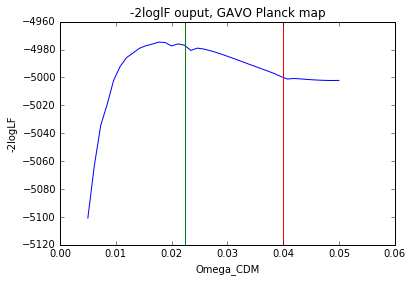

In [52]:
plt.plot(forty_samples, logLF_40)
plt.title("-2loglF ouput, GAVO Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.04, color = 'r')
plt.axvline(x = 0.02234, color = 'g')




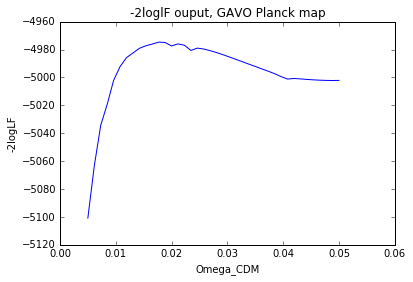

In [53]:
plt.plot(forty_samples, logLF_40)
plt.title("-2loglF ouput, GAVO Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")

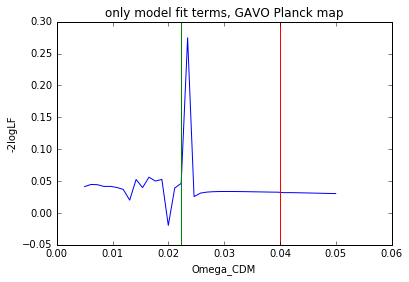

In [46]:


plt.plot(forty_samples, modelfit_terms)
plt.title("only model fit terms, GAVO Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.04, color = 'r')
plt.axvline(x = 0.02234, color = 'g')


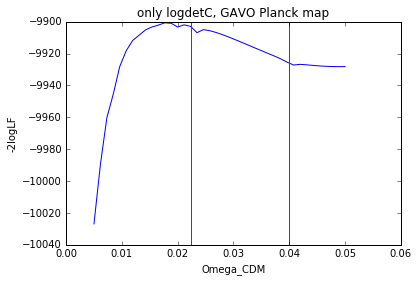

In [47]:

# In[ ]:

plt.plot(forty_samples, logdet_terms)
plt.title("only logdetC, GAVO Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.04, color = 'r')
plt.axvline(x = 0.02234, color = 'g')

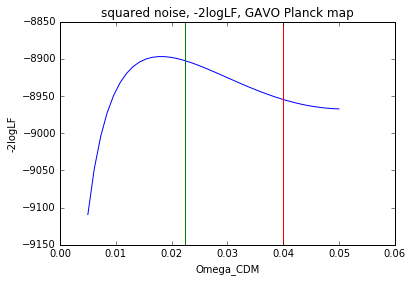

In [48]:


# In[ ]:

plt.plot(forty_samples, sqlogLF_40)
plt.title("squared noise, -2logLF, GAVO Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.04, color = 'r')
plt.axvline(x = 0.02234, color = 'g')


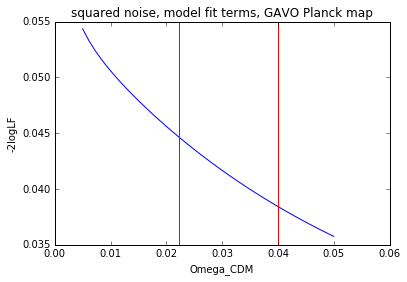

In [49]:

# In[ ]:

plt.plot(forty_samples, sqmodelfit_terms)
plt.title("squared noise, model fit terms, GAVO Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.04, color = 'r')
plt.axvline(x = 0.02234, color = 'g')

# In[ ]:


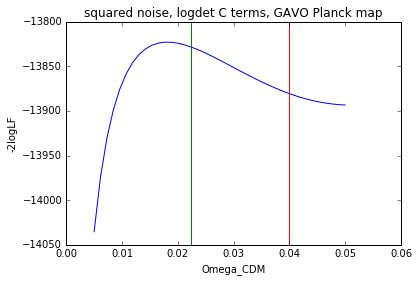

In [50]:

plt.plot(forty_samples, sqlogdet_terms)
plt.title("squared noise, logdet C terms, GAVO Planck map")
plt.ylabel("-2logLF")
plt.xlabel("Omega_CDM")
plt.axvline(x = 0.04, color = 'r')
plt.axvline(x = 0.02234, color = 'g')